In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math, time, torch, random
from exps_nn import End2EndIntervention
from tqdm import tqdm

from exps import get_random_adj, compute_v_and_o_lower_tri

o_thr = 10
n = 10
o_func = lambda v: (v[0] + v[1] + .5 * v[2])**2 + v[3]**2 + v[4]**2
seed = 42

random.seed(seed)


In [2]:
adj_res = get_random_adj(n, o_func, o_thr, edge_prob=0.4)
adj = adj_res['adj']
u = adj_res['u']

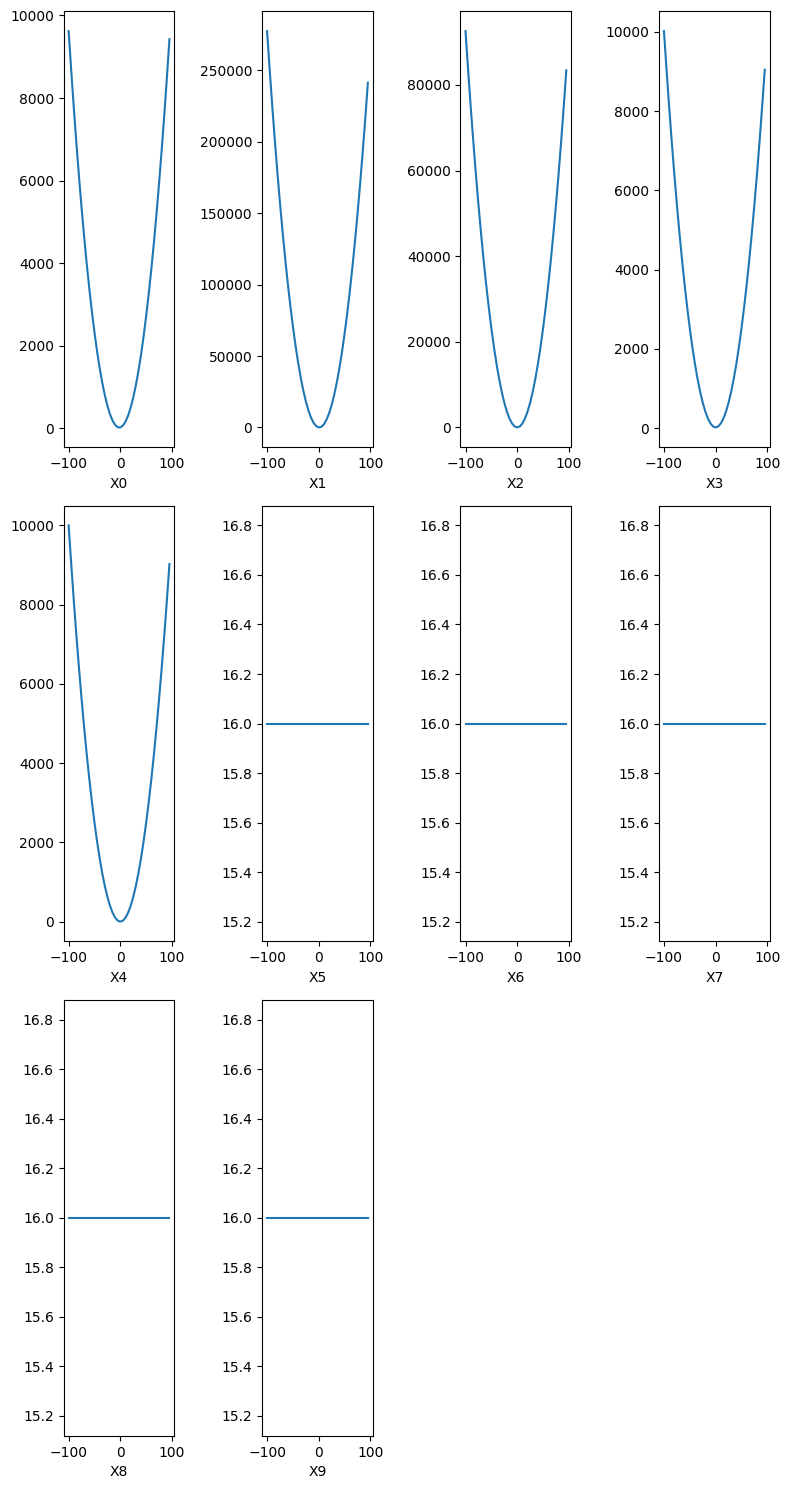

In [20]:
nrows = (n + 3) // 4
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(8, 5*nrows))
axes = axes.flatten()
xs = np.arange(-100, 100, 5)

for i, k in enumerate(range(len(adj))):
    os_ = []
    for x in xs:
        v, o = compute_v_and_o_lower_tri(adj, u, {k: x}, o_func)
        os_.append(o)
    axes[i].plot(xs, os_)
    axes[i].set_xlabel(f'X{k}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()